In [1]:
import sys
sys.path.append("../")

In [2]:
from src.nnsrc.dense import NeuralNetwork

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
from matplotlib.pyplot import plot, legend

In [5]:
data = pd.read_csv('../src/data/regression/data.cube.train.100.csv')
X = data[["x"]].values
Y = data["y"].values.reshape(-1,1)

In [6]:
def train(X, Y, scale_x=False, scale_y=False, n_layers=4,
                    n_neurons_per_layer=[2, 50, 50, 1], act_funcs=['sigmoid','sigmoid', 'sigmoid', 'sigmoid'],
                    bias=True, problem='regression'):
    X = X.copy()
    Y = Y.copy()
    X_train_scaler = MinMaxScaler((0,1))
    Y_train_scaler = MinMaxScaler((0,1))
    if scale_x:
        X = X_train_scaler.fit_transform(X)
    if scale_y:
        Y = Y_train_scaler.fit_transform(Y)
        
    nn2 = NeuralNetwork(seed=1, n_layers=n_layers,
                    n_neurons_per_layer=n_neurons_per_layer, act_funcs=act_funcs,
                    bias=bias, problem=problem)

    for layer in nn2.layers:
        print(layer.name, layer.input_dim, layer.output_dim)
    history = nn2.train(X.T, Y.T, 1000, 0.3)
    plot(list(zip(*history))[1])
    
    y_hat, cache = nn2.predict(X.T)
    if scale_y:
        y_hat = Y_train_scaler.inverse_transform(y_hat).reshape(-1,1)
        #y_hat = MinMaxScaler().fit_transform(y_hat.reshape(-1,1))
        
    #data['y_predicted'] = y_hat
    
    #plot(*zip(*sorted(zip(data.x, data.y))), label='data')
    #plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
    #legend()
    print(1 - np.linalg.norm(y_hat - y_normed)/(np.linalg.norm(y_normed.mean()-y_normed)))

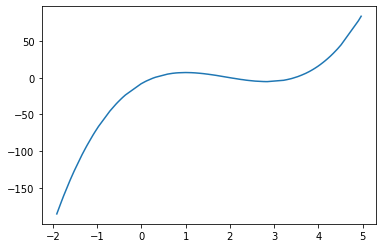

In [7]:
plot(*zip(*sorted(zip(data.x, data.y))))

In [8]:
X_train_scaler = MinMaxScaler((0,1))
Y_train_scaler = MinMaxScaler((0,1))
X_normed = X_train_scaler.fit_transform(X)
y_normed = Y_train_scaler.fit_transform(Y)

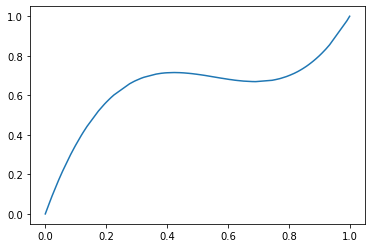

In [9]:
plot(*zip(*sorted(zip(X_normed, y_normed))))

In [10]:
#X_normed = X
#y_normed = y

In [11]:
copy_X_normed = X_normed.copy()

In [12]:
nn2 = NeuralNetwork(seed=1, n_layers=5,
                    n_neurons_per_layer=[1, 50,  50, 50, 1], act_funcs=['relu', 'relu','relu', 'relu', 'linear'],
                    bias=True, problem='regression')

for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

history = nn2.train(X_normed.T, y_normed, 15000, 0.7)

Dense_0 1 1
Dense_1 1 50
Dense_2 50 50
Dense_3 50 50
Dense_4 50 1


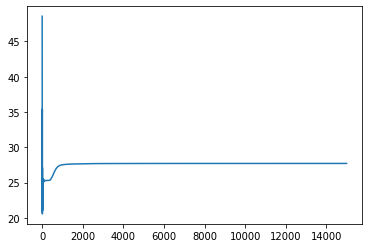

In [13]:
plot(history['cost'])

In [14]:
history['metrics']

[48.5608150532752,
 22.252883947751354,
 31.02312253357779,
 40.79071706457932,
 38.13003844385965,
 26.81215326017918,
 21.182951998972783,
 31.96981579614718,
 35.40382179703739,
 26.630498642143486,
 20.556895143892163,
 23.749607986429698,
 27.11058835179517,
 26.93390967185852,
 23.943894010015907,
 20.931694796601775,
 21.577512845294976,
 25.075604250109784,
 26.844554148897757,
 25.159761936073117,
 22.281936321831513,
 21.15025568723931,
 21.8752173719407,
 22.764550526847838,
 22.820465167289974,
 22.207558056710287,
 21.87698515730655,
 22.639344143420676,
 24.05901109611206,
 24.837520047360293,
 24.39299881601976,
 23.407771347735878,
 22.8745107122582,
 22.994452503102167,
 23.29484559749287,
 23.40493604377875,
 23.407354915172366,
 23.645284780096233,
 24.235680758195386,
 24.821674462936034,
 24.962279683057556,
 24.658104171784554,
 24.298179815227677,
 24.175042244296204,
 24.244949658692494,
 24.336996177521183,
 24.412460385226932,
 24.572972979885165,
 24.87432456

-13.114759043471013


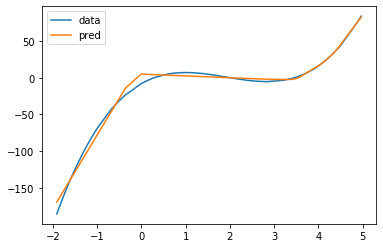

In [15]:
y_hat = nn2.predict(X_normed.T)
#y_hat = MinMaxScaler().fit_transform(y_hat.reshape(-1,1))
data['y_predicted'] = Y_train_scaler.inverse_transform(y_hat.reshape(-1,1))
plot(*zip(*sorted(zip(data.x, data.y))), label='data')
plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
legend()
print(1 - np.linalg.norm(y_hat - y_normed)/(np.linalg.norm(y_normed.mean()-y_normed)))

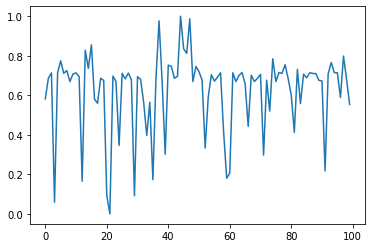

In [16]:
plot(y_normed)

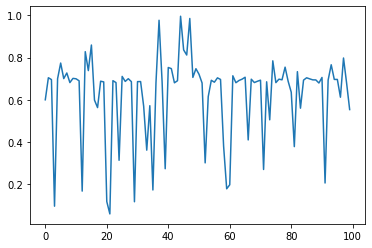

In [17]:
plot(y_hat[0])

In [18]:
## TEST ##

In [19]:
data = pd.read_csv('../src/data/regression/data.activation.test.100.csv')
X2 = data[["x"]].values
y2 = data['y'].values.reshape(-1,1)

#X2 = X_train_scaler.transform(X2)
y2 = Y_train_scaler.transform(y2)

y_hat2 = nn2.predict(X2.T)
y_hat2 = MinMaxScaler().fit_transform(y_hat2.reshape(-1,1))

print(1 - np.linalg.norm(y_hat2 - y2)/(np.linalg.norm(y2.mean()-y2)))

0.3923846380352156


In [20]:
data['y_predicted'] = Y_train_scaler.inverse_transform(y_hat2)

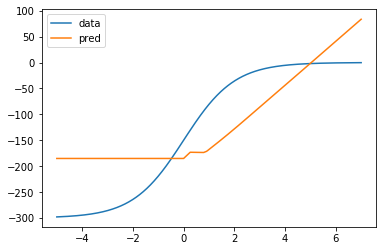

In [21]:
plot(*zip(*sorted(zip(data.x, data.y))), label='data')
plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
legend()